## **Import Library**


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## **Membaca Dataset**



In [15]:
df = pd.read_csv('/content/klasifikasimhs.csv')
df.head()

,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
0,0,PNS,10000000,3,1,0
1,0,TNI/POLRI,8000000,2,2,1
2,1,Petani,4000000,4,0,0
3,1,Nelayan,3000000,5,1,0
4,0,Buruh,2000000,2,1,1


## **Menampilkan statistik deskriptif untuk kolom numerik**

In [16]:
angka = df.select_dtypes(include='number')
statistik = angka.describe()
print(statistik)

       Tempat Tinggal  Penghasilan Orang Tua  Jumlah Tanggungan Orang Tua  \
count      100.000000           1.000000e+02                   100.000000   
mean         0.500000           5.427000e+06                     2.590000   
std          0.502519           2.533128e+06                     1.129002   
min          0.000000           7.000000e+05                     1.000000   
25%          0.000000           3.000000e+06                     2.000000   
50%          0.500000           5.500000e+06                     2.000000   
75%          1.000000           8.000000e+06                     3.250000   
max          1.000000           1.000000e+07                     5.000000   

        Kendaraan  
count  100.000000  
mean     1.070000  
std      0.655282  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.250000  
max      2.000000  


##**Menampilkan 10 record pertama dari atribut bertipe angka**

In [17]:
numerik_df = df.select_dtypes(include=['number'])

print(numerik_df.head(10))

   Tempat Tinggal  Penghasilan Orang Tua  Jumlah Tanggungan Orang Tua  \
0               0               10000000                            3   
1               0                8000000                            2   
2               1                4000000                            4   
3               1                3000000                            5   
4               0                2000000                            2   
5               1                5000000                            3   
6               0                9000000                            2   
7               1                6000000                            1   
8               1                7000000                            2   
9               0                3000000                            4   

   Kendaraan  
0          1  
1          2  
2          0  
3          1  
4          1  
5          0  
6          2  
7          1  
8          1  
9          1  


## **Menampilkan informasi umum dataset**

In [18]:
jumlah_record = df.shape[0]
jumlah_atribut = df.shape[1]
nama_atribut = df.columns.tolist()
jumlah_numerik = df.select_dtypes(include=['number']).shape[1]

print(f"Jumlah Record         : {jumlah_record}")
print(f"Jumlah Atribut        : {jumlah_atribut}")
print(f"Nama Atribut          : {nama_atribut}")
print(f"Jumlah numerik        : {jumlah_numerik}")

Jumlah Record         : 100
Jumlah Atribut        : 6
Nama Atribut          : ['Tempat Tinggal', 'Pekerjaan Orang Tua', 'Penghasilan Orang Tua', 'Jumlah Tanggungan Orang Tua', 'Kendaraan', 'Kelayakan Keringanan UKT']
Jumlah numerik        : 4


## **Jumlah label dari semua attribute yang bernilai object**

In [19]:
df_object = df.select_dtypes(include=['object'])

jumlah_label = {}
for kolom in df_object.columns:
    if kolom not in ['name', 'time']:
        jumlah_label[kolom] = df[kolom].nunique()

jumlah_label

{'Pekerjaan Orang Tua': 8, 'Kelayakan Keringanan UKT': 3}

## **Diagram Batang**

/tmp/ipython-input-944434243.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x="Pekerjaan Orang Tua", hue="Kelayakan Keringanan UKT",


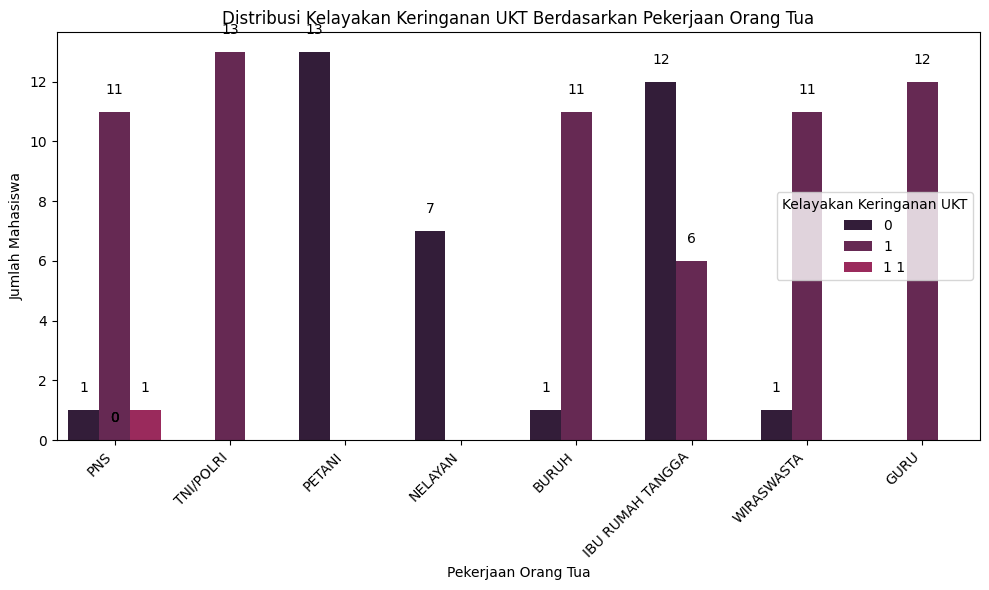

In [20]:
# Rapikan kategori pekerjaan -> hapus spasi, ubah ke huruf besar semua
df["Pekerjaan Orang Tua"] = df["Pekerjaan Orang Tua"].str.strip().str.upper()

# Buat barplot per pekerjaan vs kelayakan
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="Pekerjaan Orang Tua", hue="Kelayakan Keringanan UKT",
                   palette=sns.color_palette("rocket"))

plt.title("Distribusi Kelayakan Keringanan UKT Berdasarkan Pekerjaan Orang Tua")
plt.xlabel("Pekerjaan Orang Tua")
plt.ylabel("Jumlah Mahasiswa")
plt.xticks(rotation=45, ha="right")

# Tambahkan label angka di atas batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.5,
            str(int(p.get_height())),
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

Dari diagram batang di atas dapat dilihat bahwa distribusi kelayakan keringanan UKT berbeda-beda pada tiap kategori pekerjaan orang tua. Beberapa pekerjaan, seperti TNI/POLRI, Guru, dan Wiraswasta, didominasi oleh mahasiswa yang layak menerima keringanan UKT. Sebaliknya, pekerjaan seperti Petani dan Nelayan lebih banyak menghasilkan mahasiswa yang tidak layak menerima keringanan. Pada kategori PNS, jumlah mahasiswa yang layak dan tidak layak relatif seimbang. Hal ini menunjukkan bahwa pekerjaan orang tua berpengaruh terhadap klasifikasi kelayakan keringanan UKT, meskipun kecenderungan tiap pekerjaan tidak selalu sama.

Terkait munculnya label “1 1” pada diagram (di kategori PNS), bukan karena ada kelas baru, melainkan akibat adanya data ganda atau inkonsistensi penulisan nilai pada kolom Kelayakan Keringanan UKT. Contohnya, sebagian data berisi "1 " (dengan spasi) atau "1.0" sehingga dianggap sebagai kategori berbeda dari angka 1 murni. Jika data dibersihkan dan distandarkan, label tersebut akan hilang dan hanya menyisakan dua kategori utama: 0 (Tidak Layak) dan 1 (Layak).

## **Korelasi menggunakan Headmap**

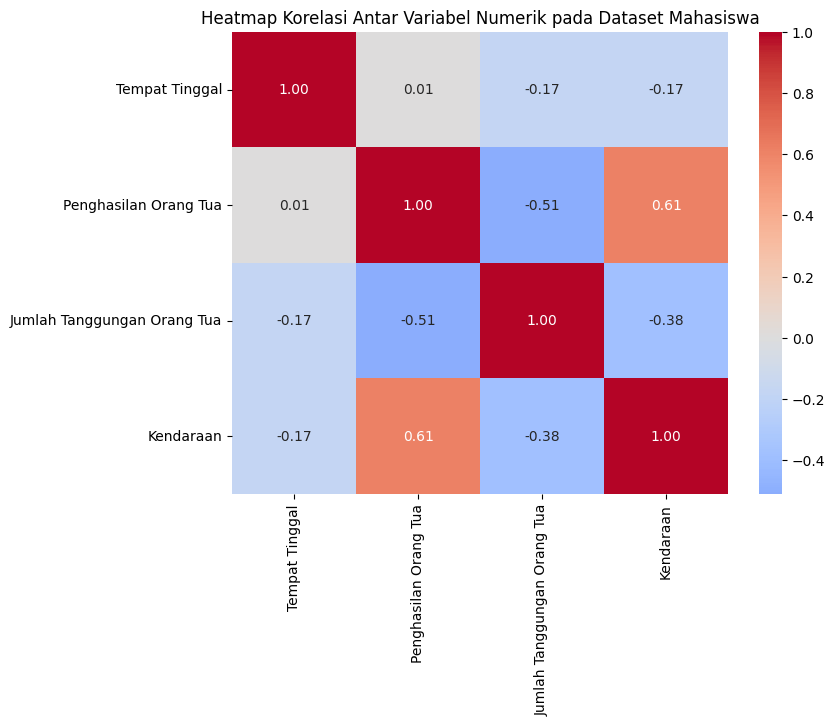

In [21]:
# Ambil hanya kolom numerik
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
cor_matrix = numerik_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix, cmap='coolwarm', annot=True, center=0, fmt=".2f")

plt.title("Heatmap Korelasi Antar Variabel Numerik pada Dataset Mahasiswa")
plt.show()

Berdasarkan hasil visualisasi menggunakan heatmap korelasi, terlihat bahwa variabel Penghasilan Orang Tua memiliki korelasi positif yang cukup kuat dengan Kelayakan Keringanan UKT. Artinya, semakin tinggi penghasilan orang tua, semakin kecil kemungkinan mahasiswa tersebut memperoleh keringanan UKT. Sebaliknya, variabel Jumlah Tanggungan Orang Tua menunjukkan korelasi negatif dengan Kelayakan Keringanan UKT, yang menandakan bahwa semakin banyak jumlah tanggungan dalam keluarga, semakin besar peluang mahasiswa dinyatakan layak menerima keringanan UKT. Sementara itu, variabel Kendaraan memiliki korelasi yang cenderung positif dengan penghasilan, namun hubungannya dengan keringanan UKT tidak terlalu signifikan. Hal ini menunjukkan bahwa penentu utama dalam klasifikasi kelayakan keringanan UKT lebih dipengaruhi oleh faktor ekonomi keluarga (penghasilan dan jumlah tanggungan) dibandingkan dengan faktor lain.

**Kesimpulan Analisis Data**

1. Distribusi Kelayakan UKT
    Jumlah mahasiswa yang layak mendapatkan keringanan UKT lebih banyak dibandingkan dengan yang tidak layak. Hal ini mengindikasikan bahwa sebagian besar mahasiswa dalam dataset memiliki kondisi yang memenuhi kriteria keringanan.

2. Pengaruh Pekerjaan Orang Tua
    Visualisasi perbandingan menunjukkan bahwa pekerjaan orang tua cukup memengaruhi status kelayakan. Mahasiswa dengan orang tua yang berprofesi sebagai buruh, nelayan, dan petani cenderung lebih banyak masuk kategori layak, sedangkan mahasiswa dengan orang tua berpenghasilan tetap atau lebih tinggi (seperti PNS dan wiraswasta) lebih banyak yang tidak layak.

3. Hubungan dengan Faktor Ekonomi
    Hasil heatmap korelasi menunjukkan bahwa variabel Penghasilan Orang Tua berkorelasi positif dengan status tidak layak, sedangkan Jumlah Tanggungan Orang Tua berkorelasi negatif. Artinya, semakin tinggi penghasilan, semakin kecil peluang mendapat keringanan; sebaliknya, semakin banyak tanggungan keluarga, semakin besar peluang layak menerima keringanan UKT.

4. Variabel Kendaraan
    Kepemilikan kendaraan memiliki hubungan yang lebih lemah terhadap kelayakan UKT dibandingkan faktor penghasilan dan jumlah tanggungan, namun tetap menunjukkan kecenderungan bahwa semakin banyak kendaraan yang dimiliki keluarga, semakin kecil kemungkinan mahasiswa layak menerima keringanan.

**Kesimpulan Utama** analisis dataset menunjukkan bahwa kelayakan keringanan UKT mahasiswa sangat dipengaruhi oleh kondisi ekonomi keluarga. Faktor yang paling dominan adalah penghasilan orang tua dan jumlah tanggungan, di mana mahasiswa dengan penghasilan orang tua rendah serta jumlah tanggungan yang lebih banyak cenderung lebih layak menerima keringanan. Pekerjaan orang tua juga berperan sebagai indikator tidak langsung terhadap kemampuan ekonomi, di mana mahasiswa dari keluarga dengan pekerjaan sektor informal (buruh, petani, nelayan) lebih sering masuk kategori layak dibandingkan dengan mahasiswa dari keluarga PNS atau wiraswasta. Secara umum, hasil analisis menegaskan bahwa keringanan UKT memang lebih banyak diberikan kepada mahasiswa yang berasal dari keluarga dengan keterbatasan ekonomi, sehingga kebijakan penentuan keringanan UKT sudah sesuai dengan tujuan untuk mendukung pemerataan akses pendidikan tinggi.

### **Nambah Kolom NIM**

In [30]:
df['NIM'] = range(1, len(df) + 1)

df = df[['NIM'] + [col for col in df.columns if col != 'NIM']]

df.to_csv("dataset_mahasiswa_with_nim.csv", index=False)

In [33]:
df = pd.read_csv('/content/dataset_mahasiswa_with_nim.csv')

saya nambahin kolom NIM supaya setiap baris data punya identitas unik dan nggak dianggap duplikat hanya karena isinya sama di beberapa kolom lain.

Sebelumnya, dataset saya belum punya kolom yang unik, jadi beberapa data mahasiswa yang kebetulan punya kondisi ekonomi atau latar belakang sama malah terdeteksi sebagai duplikat. Padahal bisa aja mereka memang mahasiswa yang berbeda, cuma datanya mirip.

Dengan nambahin kolom NIM (Nomor Induk Mahasiswa) sebagai ID unik, saya bisa ngenalin setiap baris data satu per satu tanpa harus ngubah nilai-nilai aslinya. Jadi, datanya tetap asli dan rapi, tapi sekarang bisa dibedain dengan jelas antar barisnya.

### **Data Cleaning**

### **Handling Missing Value**

In [105]:
print(df.isnull().sum())

NIM                            0
Tempat Tinggal                 0
Pekerjaan Orang Tua            0
Penghasilan Orang Tua          0
Jumlah Tanggungan Orang Tua    0
Kendaraan                      0
Kelayakan Keringanan UKT       0
Penghasilan_Standar            0
Tanggungan_Standar             0
Kendaraan_Standar              0
Kategori_Penghasilan           0
dtype: int64


di awal saya meriksa apakah ada data yang kosong di setiap kolom.  Setelah proses pengecekan selesai, hasilnya menunjukkan bahwa di dataset saya tidak terdapat null. Dengan demikian, tabel saya nggak perlu melakukan pengisian atau pembersihan data tambahan.


###**Handling Duplicate Value**

In [104]:
dups = df[df.duplicated()]
print("Jumlah baris duplikat:", dups.shape[0])

Jumlah baris duplikat: 0


di bagian ini saya lakuin pengecekan dan disini menunjukkan bahwa tidak ada baris duplikat pada dataset. Kondisi ini terjadi karena sebelumnya telah ditambahkan kolom NIM sebagai identitas unik untuk setiap mahasiswa. Sebelum kolom NIM ditambahkan, dataset sempat memiliki 77 baris duplikat karena tidak ada kolom yang bisa menjadi pembeda antar data. Setelah adanya kolom NIM, setiap baris kini memiliki nilai unik sehingga masalah duplikasi berhasil diatasi sepenuhnya.

### **Handling Outlier**

In [107]:
Q1 = df['Penghasilan Orang Tua'].quantile(0.25)
Q3 = df['Penghasilan Orang Tua'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_penghasilan = df[(df['Penghasilan Orang Tua'] < lower_bound) |
                         (df['Penghasilan Orang Tua'] > upper_bound)]

if outlier_penghasilan.empty:
    print("Tidak ada outlier ditemukan pada 'Penghasilan Orang Tua'.\n")
else:
    print("Ditemukan outlier pada 'Penghasilan Orang Tua':")
    print(outlier_penghasilan[['NIM','Penghasilan Orang Tua']])
    print("\nNamun, berdasarkan analisis konteks, nilai 2 juta dan 8 juta merupakan variasi wajar,")
    print("sehingga outlier ini tetap dipertahankan dalam dataset (tidak dihapus).")

Tidak ada outlier ditemukan pada 'Penghasilan Orang Tua'.



Saya ngelakuin analisis pada kolom “Penghasilan Orang Tua” untuk ngelihat apakah ada nilai yang termasuk outlier. Metodenya menggunakan IQR (Interquartile Range) untuk menentukan batas bawah dan batas atas dari rentang nilai yang dianggap wajar.

Hasilnya nunjukkin ada beberapa nilai yang tampak berbeda, seperti 2 juta dan 8 juta. Tapi, perbedaan tersebut masih tergolong wajar karena variasi penghasilan orang tua memang bisa cukup besar antar mahasiswa.

Makanya, saya tidak lakuin cleaning outlier, karena nilai-nilai tersebut tetap relevan dan masih mewakili kondisi sebenarnya dalam data.

### **Memperbaiki Data Anomali**

In [89]:
df['Kelayakan Keringanan UKT'] = df['Kelayakan Keringanan UKT'].replace('1 1', 1)

Sebelumnya, waktu saya buat diagram batang, disitu sempat muncul label aneh “1 1” di kategori PNS. Itu bukan karena ada kelas baru, tapi akibat inkonsistensi penulisan di kolom “Kelayakan Keringanan UKT”, karena ada data yang ditulis “1 1”.

Supaya hasil analisis lebih rapi dan kategori yang muncul sesuai saya bersihin datanya dengan mengganti nilai “1 1” jadi 1. Dengan begitu, label ganda di diagram nggak muncul lagi dan datanya jadi konsisten.

### **Standarisasi kolom numerik**

*Penghasilan Orang Tua*

In [73]:
print("Penghasilan Orang Tua :", df['Penghasilan Orang Tua'].unique())

Penghasilan Orang Tua : [10000000  8000000  4000000  3000000  2000000  5000000  9000000  6000000
  7000000   700000]


In [72]:
df['Penghasilan_Standar'] = (df['Penghasilan Orang Tua'] - df['Penghasilan Orang Tua'].mean()) / df['Penghasilan Orang Tua'].std()

print("Penghasilan Orang Tua :", df['Penghasilan_Standar'].unique())

Penghasilan Orang Tua : [ 1.80527777  1.01574015 -0.56333509 -0.9581039  -1.35287271 -0.16856628
  1.41050896  0.22620253  0.62097134 -1.86607217]


Di tahap ini saya menampilkan nilai-nilai unik yang ada di kolom “Penghasilan Orang Tua” terlebih dahulu. Tujuannya supaya saya tahu sebaran datanya kayak gimana sebelum diolah, apakah banyak variasi nilai atau cenderung sama. Setelah itu, saya lanjut dengan membuat kolom baru yang saya kasih nama “Penghasilan_Standar”. Di kolom ini, saya ubah semua nilai penghasilan jadi bentuk standar menggunakan rumus z-score, yaitu mengurangkan setiap nilai dengan rata-ratanya, lalu dibagi dengan standar deviasinya.

*Jumlah Tanggungan Orang Tua*

In [74]:
print("Jumlah Tanggungan Orang Tua :", df['Jumlah Tanggungan Orang Tua'].unique())

Jumlah Tanggungan Orang Tua : [3 2 4 5 1]


In [70]:
df['Tanggungan_Standar'] = (df['Jumlah Tanggungan Orang Tua'] - df['Jumlah Tanggungan Orang Tua'].mean()) / df['Jumlah Tanggungan Orang Tua'].std()
print("Jumlah Tanggungan Orang Tua :", df['Tanggungan_Standar'].unique())

Jumlah Tanggungan Orang Tua : [ 0.36315245 -0.52258524  1.24889015  2.13462784 -1.40832293]


Di tahap ini saya menampilkan nilai-nilai unik yang ada di kolom “Jumlah Tanggungan Orang Tua” terlebih dahulu. Tujuannya supaya saya tahu sebaran datanya seperti apa sebelum diolah, apakah jumlah tanggungannya bervariasi atau cenderung sama. Setelah itu, saya membuat kolom baru yang saya kasih nama “Tanggungan_Standar”. Di kolom ini, saya ubah semua nilai jumlah tanggungan jadi bentuk standar menggunakan rumus z-score, yaitu dengan cara mengurangkan setiap nilai dengan rata-ratanya, lalu dibagi dengan standar deviasinya.

*Kendaraan*

In [75]:
print("Kendaraan :", df['Kendaraan'].unique())

Kendaraan : [1 2 0]


In [76]:
df['Kendaraan_Standar'] = (df['Kendaraan'] - df['Kendaraan'].mean()) / df['Kendaraan'].std()
print("Kendaraan :", df['Kendaraan_Standar'].unique())

Kendaraan : [-0.10682431  1.41923722 -1.63288584]


Di tahap ini saya menampilkan nilai-nilai unik yang ada di kolom “Kendaraan” terlebih dahulu. Tujuannya supaya saya tahu sebaran datanya seperti apa sebelum diolah, apakah jumlah kendaraan yang dimiliki orang tua bervariasi atau hampir sama di setiap data. Setelah itu, saya membuat kolom baru yang saya kasih nama “Kendaraan_Standar”. Di kolom ini, saya ubah semua nilai kendaraan jadi bentuk standar menggunakan rumus z-score, yaitu dengan cara mengurangkan setiap nilai dengan rata-ratanya, lalu dibagi dengan standar deviasinya.

### **Hapus normalisasi**

In [80]:
df = df.drop(columns=['Penghasilan_Normalized'], errors='ignore')

Di bagian ini saya hapus kolom “Penghasilan_Normalized” dari dataset. Sebenarnya, awalnya saya sempat coba pakai metode normalisasi buat ngolah data penghasilan, tapi setelah saya pikir lagi, metode itu kurang cocok. Soalnya, untuk data seperti penghasilan yang skalanya bisa jauh banget antar satu dengan yang lain, lebih pas kalau pakai standarisasi. Dengan standarisasi, data tetap bisa dibandingkan dengan adil tanpa harus “memaksa” semuanya ke rentang 0 sampai 1 seperti di normalisasi. Makanya, kolom hasil normalisasi saya hapus supaya data yang saya pakai tetap konsisten dan sesuai kebutuhan analisis.

###**One-Hot Encoding**

In [109]:
df_encoded = pd.get_dummies(df, columns=['Pekerjaan Orang Tua'])

import pandas as pd
from IPython.display import display

display(df_encoded.head(10))

,NIM,Tempat Tinggal,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT,Penghasilan_Standar,Tanggungan_Standar,Kendaraan_Standar,Kategori_Penghasilan,Pekerjaan Orang Tua_BURUH,Pekerjaan Orang Tua_GURU,Pekerjaan Orang Tua_IBU RUMAH TANGGA,Pekerjaan Orang Tua_NELAYAN,Pekerjaan Orang Tua_PETANI,Pekerjaan Orang Tua_PNS,Pekerjaan Orang Tua_TNI/POLRI,Pekerjaan Orang Tua_WIRASWASTA
0,1,0,10000000,3,1,0,1.805278,0.363152,-0.106824,High,False,False,False,False,False,True,False,False
1,2,0,8000000,2,2,1,1.015740,-0.522585,1.419237,High,False,False,False,False,False,False,True,False
2,3,1,4000000,4,0,0,-0.563335,1.248890,-1.632886,Medium,False,False,False,False,True,False,False,False
3,4,1,3000000,5,1,0,-0.958104,2.134628,-0.106824,Low,False,False,False,True,False,False,False,False
4,5,0,2000000,2,1,1,-1.352873,-0.522585,-0.106824,Low,True,False,False,False,False,False,False,False
5,6,1,5000000,3,0,0,-0.168566,0.363152,-1.632886,Medium,False,False,True,False,False,False,False,False
6,7,0,9000000,2,2,1,1.410509,-0.522585,1.419237,High,False,False,False,False,False,True,False,False
7,8,1,6000000,1,1,1,0.226203,-1.408323,-0.106824,Medium,False,False,False,False,False,False,False,True
8,9,1,7000000,2,1,1,0.620971,-0.522585,-0.106824,High,False,True,False,False,False,False,False,False
9,10,0,3000000,4,1,0,-0.958104,1.248890,-0.106824,Low,False,False,True,False,False,False,False,False


Di bagian ini saya melakukan proses encoding pada kolom “Pekerjaan Orang Tua” dengan menggunakan fungsi `pd.get_dummies()`. Tujuannya supaya data kategorikal di kolom tersebut bisa diubah jadi bentuk yang bisa dibaca oleh model analisis. Hasilnya, setiap jenis pekerjaan orang tua berubah jadi kolom baru yang isinya True atau False, tergantung apakah baris data itu punya kategori tersebut atau nggak.

Setelah proses encoding selesai, saya menampilkan 10 data teratas untuk memastikan kalau proses pengubahan datanya udah berhasil dan kolom-kolom baru hasil encoding-nya muncul dengan benar.

###**Feature Engineering dari Kategori Penghasilan**

In [110]:
def kategori_penghasilan(x):
    if x <= 3000000:
        return "Low"
    elif x <= 6000000:
        return "Medium"
    else:
        return "High"

df['Kategori_Penghasilan'] = df['Penghasilan Orang Tua'].apply(kategori_penghasilan)

print(df[['Penghasilan Orang Tua', 'Kategori_Penghasilan']].head(10))

   Penghasilan Orang Tua Kategori_Penghasilan
0               10000000                 High
1                8000000                 High
2                4000000               Medium
3                3000000                  Low
4                2000000                  Low
5                5000000               Medium
6                9000000                 High
7                6000000               Medium
8                7000000                 High
9                3000000                  Low


bagian ini saya buat fungsi bernama kategori_penghasilan yang isinya untuk ngelompokkan data penghasilan orang tua ke dalam tiga kategori, yaitu Low, Medium, dan High. Logikanya, kalau nilai penghasilan kurang dari atau sama dengan 3 juta, maka masuk kategori Low. Kalau penghasilannya antara lebih dari 3 juta sampai 6 juta, masuk kategori Medium, dan kalau di atas 6 juta, berarti masuk kategori High.

Setelah fungsi itu jadi, saya terapkan ke kolom “Penghasilan Orang Tua” dengan menggunakan `.apply()`, lalu hasilnya saya simpan di kolom baru yang saya kasih nama “Kategori_Penghasilan”. Terakhir, saya tampilkan 10 data pertama untuk mastikan kalau pengelompokan penghasilan ini udah berhasil dan setiap nilai penghasilan udah punya kategori yang sesuai.

###**Splitting Data**

In [95]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Kelayakan Keringanan UKT'])
y = df['Kelayakan Keringanan UKT']

y = pd.to_numeric(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training :", X_train.shape[0])
print("Jumlah data testing  :", X_test.shape[0])

Jumlah data training : 80
Jumlah data testing  : 20


di bagian akhir ini saya mulai mempersiapkan data untuk proses pelatihan (training) dan pengujian (testing) model. Pertama, saya pisahkan antara fitur (X) dan label (y). Kolom “Kelayakan Keringanan UKT” saya jadikan sebagai label (y) karena itu yang akan diprediksi, sedangkan kolom lainnya saya simpan di X sebagai data fitur.

Selanjutnya, saya ubah nilai pada y jadi bentuk numerik pakai pd.to_numeric() supaya bisa diproses oleh model machine learning. Setelah itu, saya bagi dataset menjadi dua bagian menggunakan fungsi train_test_split(), yaitu 80% untuk data training dan 20% untuk data testing. Saya juga tambahkan parameter stratify=y supaya pembagian data tetap seimbang berdasarkan kategori di labelnya.

Terakhir, saya tampilkan jumlah data training dan testing buat memastikan kalau proses pembagian datanya udah berhasil dan proporsinya sesuai yang diinginkan.